In [2]:
# Import required packages
from os import chdir
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import pymysql
from pandasql import sqldf
import statsmodels.api as sm
from sklearn.cluster import KMeans

# Set working directory
wd="/Users/geoffrey.kip/Projects/uci_diabetes"
chdir(wd)


/Users/geoffrey.kip/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# connect to database
host = '127.0.0.1'
user = 'root'
password = ''
port = 3306
db = 'hospitals'

# Connect to sql database with data inside
conn = pymysql.connect(host= host, port=port, user= user, passwd='', db=db)


In [4]:
#Graph function

def graph(labels=None,data=None,color=None,title=None,ylabel=None,y_pos=None,graph_type=None):
    if graph_type == "bar":
        fig= plt.figure()
        ax= fig.add_subplot(111)
        ax.bar(labels,data, align='center',color=color,alpha=0.5)
        ax.set_facecolor('gray')
        plt.xticks(y_pos, labels,rotation=90)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.show()
    elif graph_type == "pie":
        fig=plt.figure()
        ax=fig.add_subplot(111)
        ax.pie(data, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax.set_title(title)
        plt.show()


In [5]:
# Read full dataset and map different id codes
diabetes_df=pd.read_sql("""SELECT * ,
CASE
WHEN admission_type_id=1 THEN "Emergency"
WHEN admission_type_id=2 THEN "Urgent"
WHEN admission_type_id=3 THEN "Elective"
WHEN admission_type_id=4 THEN "Newborn"
WHEN admission_type_id=5 THEN "Not Available"
WHEN admission_type_id=6 THEN "NULL"
WHEN admission_type_id=7 THEN "Trauma Center"
ELSE null
END as admission_type_id_description,
CASE WHEN discharge_disposition_id=1 THEN "Discharged to home"
WHEN discharge_disposition_id=2 THEN "Discharged/transferred to another short term hospital"
WHEN discharge_disposition_id=3 THEN "Discharged/transferred to SNF"
WHEN discharge_disposition_id=4 THEN "Discharged/transferred to ICF"
WHEN discharge_disposition_id=5 THEN "Discharged/transferred to another type of inpatient care institution"
WHEN discharge_disposition_id=6 THEN "Discharged/transferred to home with home health service"
WHEN discharge_disposition_id=7 THEN "Left AMA"
WHEN discharge_disposition_id=8 THEN "Discharged/transferred to home under care of Home IV provider"
WHEN discharge_disposition_id=9 THEN "Admitted as an inpatient to this hospital"
WHEN discharge_disposition_id=10 THEN "Neonate discharged to another hospital for neonatal aftercare"
WHEN discharge_disposition_id=11 THEN "Expired"
WHEN discharge_disposition_id=12 THEN "Still patient or expected to return for outpatient services"
WHEN discharge_disposition_id=13 THEN "Hospice / home"
WHEN discharge_disposition_id=14 THEN "Hospice / medical facility"
WHEN discharge_disposition_id=15 THEN "Discharged/transferred within this institution to Medicare approved swing bed"
WHEN discharge_disposition_id=16 THEN "Discharged/transferred/referred another institution for outpatient services"
WHEN discharge_disposition_id=17 THEN "Discharged/transferred/referred to this institution for outpatient services"
WHEN discharge_disposition_id=18 THEN "NULL"
WHEN discharge_disposition_id=19 THEN "Expired at home. Medicaid only, hospice."
WHEN discharge_disposition_id=20 THEN "Expired in a medical facility. Medicaid only, hospice."
WHEN discharge_disposition_id=21 THEN "Expired, place unknown. Medicaid only, hospice."
WHEN discharge_disposition_id=22 THEN "Discharged/transferred to another rehab fac including rehab units of a hospital ."
WHEN discharge_disposition_id=23 THEN "Discharged/transferred to a long term care hospital."
WHEN discharge_disposition_id=24 THEN "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare."
WHEN discharge_disposition_id=25 THEN "Not Mapped"
WHEN discharge_disposition_id=26 THEN "Unknown/Invalid"
WHEN discharge_disposition_id=30 THEN "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere"
WHEN discharge_disposition_id=27 THEN "Discharged/transferred to a federal health care facility"
WHEN discharge_disposition_id=28 THEN "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital"
WHEN discharge_disposition_id=29 THEN "Discharged/transferred to a Critical Access Hospital (CAH)"
ELSE NULL
END as discharge_disposition_id_description,
CASE
WHEN admission_source_id=1 THEN " Physician Referral"
WHEN admission_source_id=2 THEN "Clinic Referral"
WHEN admission_source_id=3 THEN "HMO Referral"
WHEN admission_source_id=4 THEN "Transfer from a hospital"
WHEN admission_source_id=5 THEN " Transfer from a Skilled Nursing Facility (SNF)"
WHEN admission_source_id=6 THEN " Transfer from another health care facility"
WHEN admission_source_id=7 THEN " Emergency Room"
WHEN admission_source_id=8 THEN " Court/Law Enforcement"
WHEN admission_source_id=9 THEN " Not Available"
WHEN admission_source_id=10 THEN " Transfer from critial access hospital"
WHEN admission_source_id=11 THEN "Normal Delivery"
WHEN admission_source_id=12 THEN " Premature Delivery"
WHEN admission_source_id=13 THEN " Sick Baby"
WHEN admission_source_id=14 THEN " Extramural Birth"
WHEN admission_source_id=15 THEN "Not Available"
WHEN admission_source_id=17 THEN "NULL"
WHEN admission_source_id=18 THEN " Transfer From Another Home Health Agency"
WHEN admission_source_id=19 THEN "Readmission to Same Home Health Agency"
WHEN admission_source_id=20 THEN " Not Mapped"
WHEN admission_source_id=21 THEN "Unknown/Invalid"
WHEN admission_source_id=22 THEN " Transfer from hospital inpt/same fac reslt in a sep claim"
WHEN admission_source_id=23 THEN " Born inside this hospital"
WHEN admission_source_id=24 THEN " Born outside this hospital"
WHEN admission_source_id=25 THEN " Transfer from Ambulatory Surgery Center"
WHEN admission_source_id=26 THEN "Transfer from Hospice"
ELSE NULL
END as admission_source_id_description
FROM hospitals.diabetes;
""", con=conn)


In [6]:
#Basic exploration
print(diabetes_df.head())
print(diabetes_df.shape)

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital               ...               glipizide_metformin  \
0                 1               ...                      

In [22]:
diabetes_df[diabetes_df.columns.difference(['encounter_id', 'patient_nbr','admission_type_id',
                                                  'discharge_disposition_id','admission_source_id'])].describe()

,num_lab_procedures,num_medications,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,time_in_hospital
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,43.095641,16.021844,1.339730,7.422607,0.197836,0.635566,0.369357,4.395987
std,19.674362,8.127566,1.705807,1.933600,0.930472,1.262863,1.267265,2.985108
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,31.000000,10.000000,0.000000,6.000000,0.000000,0.000000,0.000000,2.000000
50%,44.000000,15.000000,1.000000,8.000000,0.000000,0.000000,0.000000,4.000000
75%,57.000000,20.000000,2.000000,9.000000,0.000000,1.000000,0.000000,6.000000
max,132.000000,81.000000,6.000000,16.000000,76.000000,21.000000,42.000000,14.000000


In [9]:
diabetes_df.groupby("readmitted").size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [10]:
#Find null or missing
diabetes_df.isnull().sum()
diabetes_df.isna().sum()

encounter_id                              0
patient_nbr                               0
race                                      0
gender                                    0
age                                       0
weight                                    0
admission_type_id                         0
discharge_disposition_id                  0
admission_source_id                       0
time_in_hospital                          0
payer_code                                0
medical_specialty                         0
num_lab_procedures                        0
num_procedures                            0
num_medications                           0
number_outpatient                         0
number_emergency                          0
number_inpatient                          0
diag_1                                    0
diag_2                                    0
diag_3                                    0
number_diagnoses                          0
max_glu_serum                   

In [12]:
#Exploratory analysis time 
# How many encounters by patient
q="""Select 
     patient_nbr,
     count(distinct encounter_id) as encounters
     from diabetes_df
     group by 1
     order by 2 desc"""
patient_encounters = sqldf(q)
print(patient_encounters)

       patient_nbr  encounters
0         88785891          40
1         43140906          28
2          1660293          23
3         23199021          23
4         88227540          23
5         23643405          22
6         84428613          22
7         92709351          21
8         23398488          20
9         29903877          20
10        37096866          20
11        88789707          20
12        89472402          20
13        90609804          20
14        88479036          19
15        88681950          19
16        97391007          19
17         3401055          18
18         3481272          18
19        24011577          18
20        84348792          18
21        91160280          18
22        91751121          18
23        41699412          17
24        90489195          17
25       106757478          17
26          384939          16
27        41617368          16
28        84676248          16
29        90164655          16
...            ...         ...
71488   

In [13]:
q="""Select AVG(encounters) as average_encounters from (Select 
     patient_nbr,
     count(distinct encounter_id) as encounters
     from diabetes_df
     group by 1
     order by 2 desc)"""
avg_patient_encounters = sqldf(q)
print(avg_patient_encounters)

   average_encounters
0            1.422942


In [14]:
#Mean figures medications etc
q = """Select 
       AVG(num_procedures) as mean_num_procedures,
       AVG(num_medications) as mean_num_medications,
       AVG(num_lab_procedures) as mean_num_lab_procedures,
       AVG(time_in_hospital) as average_time_in_hospital,
       AVG(number_outpatient) as mean_outpatient_visits,
       AVG(number_emergency) as mean_emergency_visits,
       AVG(number_diagnoses) as mean_number_diagnoses,
       AVG(number_inpatient) as mean_number_inpatient
       from diabetes_df"""
average_measurements = sqldf(q)
print(average_measurements)

   mean_num_procedures  mean_num_medications  mean_num_lab_procedures  \
0              1.33973             16.021844                43.095641   

   average_time_in_hospital  mean_outpatient_visits  mean_emergency_visits  \
0                  4.395987                0.369357               0.197836   

   mean_number_diagnoses  mean_number_inpatient  
0               7.422607               0.635566  


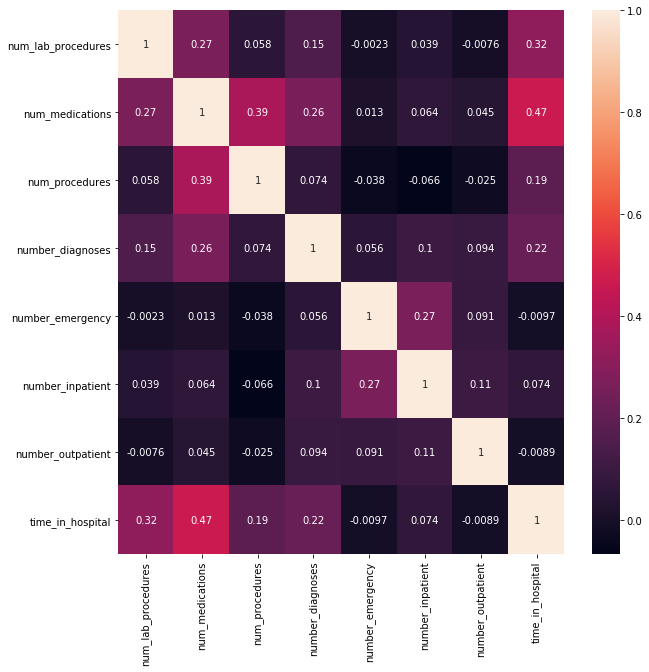

In [15]:
# Which variables are correlated with each other?
corr = diabetes_df[diabetes_df.columns.difference(['encounter_id', 'patient_nbr','admission_type_id',
                                                  'discharge_disposition_id','admission_source_id'])].corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot = True, ax=ax)

In [23]:
# simple statical regression model to understand beta coefficients for some data points
train_cols=['num_procedures', 'num_medications','num_lab_procedures','time_in_hospital','number_outpatient',
               'number_emergency','number_diagnoses','number_inpatient']
# Recode readmitted to binary for model
diabetes_df["readmission"]= np.where(diabetes_df["readmitted"] == '<30',1,0)
logit = sm.Logit(diabetes_df['readmission'], diabetes_df[train_cols])

# fit the model
result = logit.fit()
print (result.summary2())

Optimization terminated successfully.
         Current function value: 0.360832
         Iterations 6
                          Results: Logit
Model:                Logit            No. Iterations:   6.0000    
Dependent Variable:   readmission      Pseudo R-squared: -0.031    
Date:                 2018-09-16 20:16 AIC:              73456.9204
No. Observations:     101766           BIC:              73533.1638
Df Model:             7                Log-Likelihood:   -36720.   
Df Residuals:         101758           LL-Null:          -35602.   
Converged:            1.0000           Scale:            1.0000    
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
num_procedures     -0.0548   0.0066  -8.2692 0.0000 -0.0678 -0.0418
num_medications    -0.0071   0.0015  -4.6301 0.0000 -0.0100 -0.0041
num_lab_procedures -0.0126   0.0005 -26.0

In [17]:
# Average measurements by race
qb = """Select 
       race,
       AVG(num_procedures) as mean_num_procedures,
       AVG(num_medications) as mean_num_medications,
       AVG(num_lab_procedures) as mean_num_lab_procedures,
       AVG(time_in_hospital) as average_time_in_hospital,
       AVG(number_outpatient) as mean_outpatient_visits,
       AVG(number_emergency) as mean_emergency_visits,
       AVG(number_diagnoses) as mean_number_diagnoses,
       AVG(number_inpatient) as mean_number_inpatient
       from diabetes_df
       group by 1"""
average_measurements_by_race = sqldf(qb)
print(average_measurements_by_race)

              race  mean_num_procedures  mean_num_medications  \
0                ?             1.302684             15.813462   
1  AfricanAmerican             1.234669             15.368922   
2            Asian             1.344774             13.291732   
3        Caucasian             1.369466             16.285733   
4         Hispanic             1.116838             14.030437   
5            Other             1.532537             15.185923   

   mean_num_lab_procedures  average_time_in_hospital  mean_outpatient_visits  \
0                44.104707                  4.289485                0.194457   
1                44.085060                  4.507860                0.239927   
2                41.212168                  3.995320                0.165367   
3                42.832941                  4.385721                0.412410   
4                42.793324                  4.059892                0.324497   
5                43.436919                  4.273572            

In [8]:
#Measurements by readmission status
qb = """Select 
       readmitted,
       AVG(num_procedures) as mean_num_procedures,
       AVG(num_medications) as mean_num_medications,
       AVG(num_lab_procedures) as mean_num_lab_procedures,
       AVG(time_in_hospital) as average_time_in_hospital,
       AVG(number_outpatient) as mean_outpatient_visits,
       AVG(number_emergency) as mean_emergency_visits,
       AVG(number_diagnoses) as mean_number_diagnoses,
       AVG(number_inpatient) as mean_number_inpatient
       from diabetes_df
       group by 1"""
average_measurements_by_readmission = sqldf(qb)


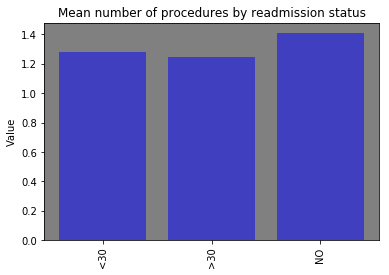

In [10]:
labels = (np.array(average_measurements_by_readmission.readmitted))
y_pos=np.arange(len(labels))

graph(labels=labels,data=average_measurements_by_readmission['mean_num_procedures'],
      color='blue',title='Mean number of procedures by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')


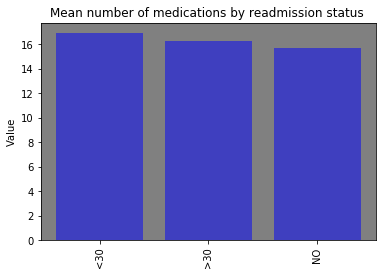

In [12]:
graph(labels=labels,data=average_measurements_by_readmission['mean_num_medications'],
      color='blue',title='Mean number of medications by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')


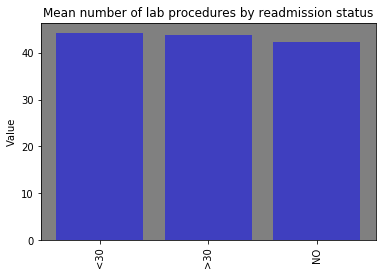

In [14]:
graph(labels=labels,data=average_measurements_by_readmission['mean_num_lab_procedures'],
      color='blue',title='Mean number of lab procedures by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')


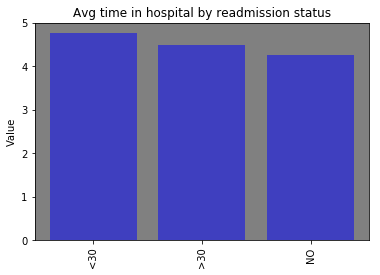

In [15]:
graph(labels=labels,data=average_measurements_by_readmission['average_time_in_hospital'],
      color='blue',title='Avg time in hospital by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')


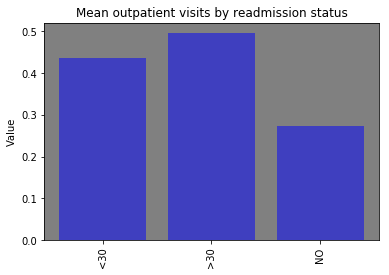

In [16]:
graph(labels=labels,data=average_measurements_by_readmission['mean_outpatient_visits'],
      color='blue',title='Mean outpatient visits by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')


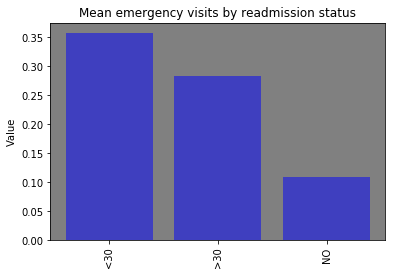

In [17]:
graph(labels=labels,data=average_measurements_by_readmission['mean_emergency_visits'],
      color='blue',title='Mean emergency visits by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')


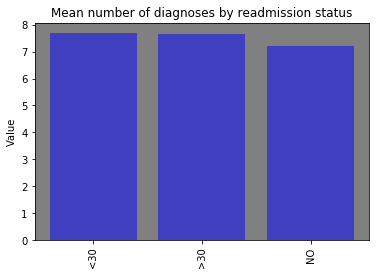

In [18]:
graph(labels=labels,data=average_measurements_by_readmission['mean_number_diagnoses'],
      color='blue',title='Mean number of diagnoses by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')


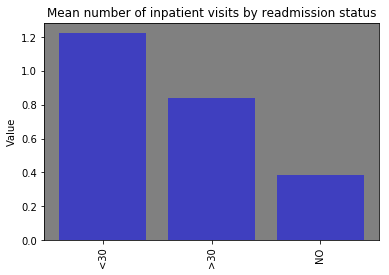

In [19]:
graph(labels=labels,data=average_measurements_by_readmission['mean_number_inpatient'],
      color='blue',title='Mean number of inpatient visits by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')


      weight  total_individuals  readmitted_individuals  \
9       >200                  3                       1   
8  [175-200)                 10                       2   
5     [0-25)                 47                       9   
0          ?              68688                    8503   
1   [75-100)               1238                     149   
3  [100-125)                585                      68   
2    [50-75)                814                      94   
7  [150-175)                 35                       4   
4  [125-150)                136                      13   
6    [25-50)                 94                       8   

   percentage_of_individuals_readmitted  
9                             33.333333  
8                             20.000000  
5                             19.148936  
0                             12.379164  
1                             12.035541  
3                             11.623932  
2                             11.547912  
7             

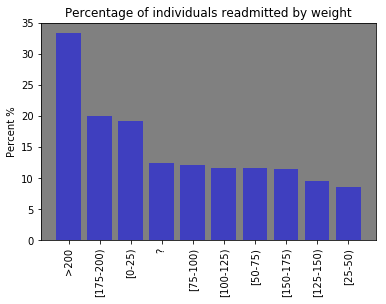

In [34]:
#Weight and readmission status
q0 = """Select weight, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
weight_readmitted_patients = sqldf(q0)
weight_readmitted_patients["percentage_of_individuals_readmitted"]= weight_readmitted_patients['readmitted_individuals']/weight_readmitted_patients['total_individuals'] * 100
weight_readmitted_patients= weight_readmitted_patients.sort_values("percentage_of_individuals_readmitted",ascending=False)
print(weight_readmitted_patients)

labels = (np.array(weight_readmitted_patients.weight))
y_pos=np.arange(len(labels))

graph(labels=labels,data=weight_readmitted_patients['percentage_of_individuals_readmitted'],
      color='blue',title='Percentage of individuals readmitted by weight',ylabel='Percent %',y_pos=y_pos,
      graph_type='bar')


              race  total_individuals  readmitted_individuals  \
0        Caucasian              53601                    6741   
1  AfricanAmerican              12932                    1606   
2         Hispanic               1534                     169   
5            Asian                517                      53   
4            Other               1209                     121   
3                ?               1977                     165   

   percentage_of_individuals_readmitted  
0                             12.576258  
1                             12.418806  
2                             11.016949  
5                             10.251451  
4                             10.008271  
3                              8.345979  


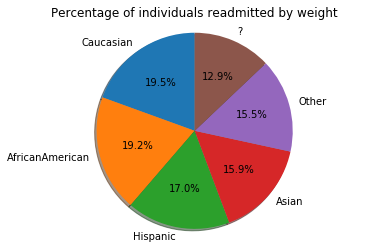

In [35]:
# Race distribution of patients against readmission within 30 days
q1 = """Select race, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
race_readmitted_patients = sqldf(q1)
race_readmitted_patients["percentage_of_individuals_readmitted"]= race_readmitted_patients['readmitted_individuals']/race_readmitted_patients['total_individuals'] * 100
race_readmitted_patients= race_readmitted_patients.sort_values("percentage_of_individuals_readmitted",ascending=False)
print(race_readmitted_patients)

labels = (np.array(race_readmitted_patients.race))
y_pos=np.arange(len(labels))

graph(labels=labels,data=race_readmitted_patients['percentage_of_individuals_readmitted'],
      title='Percentage of individuals readmitted by weight',y_pos=y_pos,
      graph_type='pie')

            gender  total_individuals  readmitted_individuals  \
2  Unknown/Invalid                  3                       1   
0           Female              38026                    4755   
1             Male              33492                    4081   

   percentage_of_individuals_readmitted  
2                             33.333333  
0                             12.504602  
1                             12.184999  


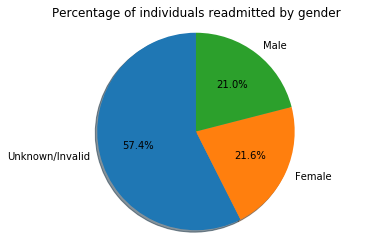

In [36]:
#Gender distribution of patients against readmission within 30 days
q2 = """Select gender, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
gender_readmitted_patients = sqldf(q2)
gender_readmitted_patients["percentage_of_individuals_readmitted"]= gender_readmitted_patients['readmitted_individuals']/gender_readmitted_patients['total_individuals'] * 100
gender_readmitted_patients= gender_readmitted_patients.sort_values("percentage_of_individuals_readmitted",ascending=False)
print(gender_readmitted_patients)

labels = (np.array(gender_readmitted_patients.gender))
y_pos=np.arange(len(labels))

graph(labels=labels,data=gender_readmitted_patients['percentage_of_individuals_readmitted'],
      title='Percentage of individuals readmitted by gender',y_pos=y_pos,
      graph_type='pie')


        age  total_individuals  readmitted_individuals  \
2   [80-90)              12008                    1726   
0   [70-80)              18584                    2516   
6  [90-100)               2042                     261   
1   [60-70)              16281                    1989   
7   [20-30)               1138                     124   
5   [30-40)               2727                     289   
4   [40-50)               6956                     713   
3   [50-60)              12666                    1266   
8   [10-20)                536                      33   
9    [0-10)                154                       4   

   percentage_of_individuals_readmitted  
2                             14.373751  
0                             13.538528  
6                             12.781587  
1                             12.216694  
7                             10.896309  
5                             10.597726  
4                             10.250144  
3                        

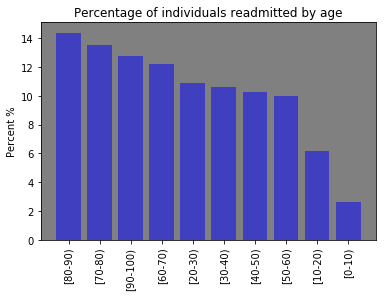

In [37]:
# Age distribution of patients against readmission within 30 days
q3 = """Select age, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
age_readmitted_patients = sqldf(q3)
age_readmitted_patients["percentage_of_individuals_readmitted"]= age_readmitted_patients['readmitted_individuals']/age_readmitted_patients['total_individuals'] * 100
age_readmitted_patients= age_readmitted_patients.sort_values("percentage_of_individuals_readmitted",ascending=False)
print(age_readmitted_patients)

labels = (np.array(age_readmitted_patients.age))
y_pos=np.arange(len(labels))

graph(labels=labels,data=age_readmitted_patients['percentage_of_individuals_readmitted'],
      color='blue',title='Percentage of individuals readmitted by age',ylabel='Percent %',y_pos=y_pos,
      graph_type='bar')

  diabetesMed  total_individuals  readmitted_individuals  \
0         Yes              56178                    7230   
1          No              19580                    1917   

   percentage_of_individuals_readmitted  
0                             12.869807  
1                              9.790603  


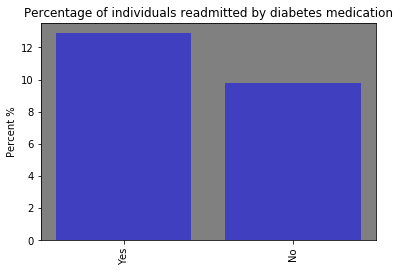

In [38]:
# Is diabetes medication related to readmission within 30 days?
q4 = """Select diabetesMed, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
diabetes_readmitted_patients = sqldf(q4)
diabetes_readmitted_patients["percentage_of_individuals_readmitted"]= diabetes_readmitted_patients['readmitted_individuals']/diabetes_readmitted_patients['total_individuals'] * 100
diabetes_readmitted_patients= diabetes_readmitted_patients.sort_values("percentage_of_individuals_readmitted",ascending=False)
print(diabetes_readmitted_patients)

labels = (np.array(diabetes_readmitted_patients.diabetesMed))
y_pos=np.arange(len(labels))

graph(labels=labels,data=diabetes_readmitted_patients['percentage_of_individuals_readmitted'],
      color='blue',title='Percentage of individuals readmitted by diabetes medication',ylabel='Percent %',y_pos=y_pos,
      graph_type='bar')

  admission_type_id_description  total_individuals  readmitted_individuals  \
6                       Newborn                 10                       2   
0                     Emergency              39879                    5031   
4                 Not Available               3364                     412   
1                        Urgent              15367                    1802   
3                          NULL               4697                     537   
2                      Elective              16325                    1746   
5                          None                318                      28   
7                 Trauma Center                 21                       1   

   percentage_of_individuals_readmitted  
6                             20.000000  
0                             12.615662  
4                             12.247325  
1                             11.726427  
3                             11.432829  
2                             10.695253  
5  

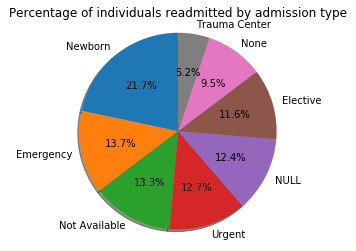

In [39]:
# Does admission type affect readmission within 30 days?
q5 = """Select admission_type_id_description, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
admission_readmitted_patients = sqldf(q5)
admission_readmitted_patients["percentage_of_individuals_readmitted"]= admission_readmitted_patients['readmitted_individuals']/admission_readmitted_patients['total_individuals'] * 100
admission_readmitted_patients= admission_readmitted_patients.sort_values("percentage_of_individuals_readmitted",ascending=False)
print(admission_readmitted_patients)

labels = (np.array(admission_readmitted_patients.admission_type_id_description))
y_pos=np.arange(len(labels))

graph(labels=labels,data=admission_readmitted_patients['percentage_of_individuals_readmitted'],
      title='Percentage of individuals readmitted by admission type',y_pos=y_pos,
      graph_type='pie')

  A1Cresult  total_individuals  readmitted_individuals  \
0      None              60910                    7594   
3        >7               3664                     378   
1        >8               7427                     760   
2      Norm               4728                     471   

   percentage_of_individuals_readmitted  
0                             12.467575  
3                             10.316594  
1                             10.232934  
2                              9.961929  


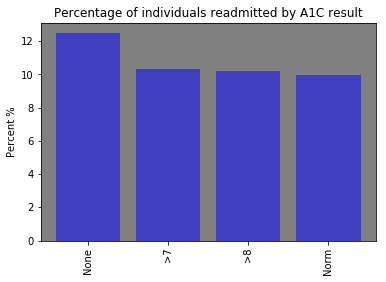

In [40]:
# Does A1cresult affect readmission within 30 days
q9= """Select A1Cresult, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
a1c_readmitted_patients = sqldf(q9)
a1c_readmitted_patients["percentage_of_individuals_readmitted"]= a1c_readmitted_patients['readmitted_individuals']/a1c_readmitted_patients['total_individuals'] * 100
a1c_readmitted_patients= a1c_readmitted_patients.sort_values("percentage_of_individuals_readmitted",ascending=False)
print(a1c_readmitted_patients)

labels = (np.array(a1c_readmitted_patients.A1Cresult))
y_pos=np.arange(len(labels))

graph(labels=labels,data=a1c_readmitted_patients['percentage_of_individuals_readmitted'],
      color='blue',title='Percentage of individuals readmitted by A1C result',ylabel='Percent %',y_pos=y_pos,
      graph_type='bar')

  any_change  total_individuals  readmitted_individuals  \
1         Ch              35249                    4543   
0         No              42825                    4811   

   percentage_of_individuals_readmitted  
1                             12.888309  
0                             11.234092  


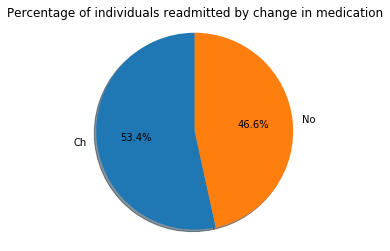

In [41]:
# Did change in medications lead to readmission?
q10= """Select any_change, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
change_readmitted_patients = sqldf(q10)
change_readmitted_patients["percentage_of_individuals_readmitted"]= change_readmitted_patients['readmitted_individuals']/change_readmitted_patients['total_individuals'] * 100
change_readmitted_patients= change_readmitted_patients.sort_values("percentage_of_individuals_readmitted",ascending=False)
print(change_readmitted_patients)

labels = (np.array(change_readmitted_patients.any_change))
y_pos=np.arange(len(labels))

graph(labels=labels,data=change_readmitted_patients['percentage_of_individuals_readmitted'],
      title='Percentage of individuals readmitted by change in medication',y_pos=y_pos,
      graph_type='pie')

  max_glu_serum  total_individuals  readmitted_individuals  \
3          >300                997                     145   
2          >200               1257                     174   
1          Norm               2000                     258   
0          None              68168                    8347   

   percentage_of_individuals_readmitted  
3                             14.543631  
2                             13.842482  
1                             12.900000  
0                             12.244748  


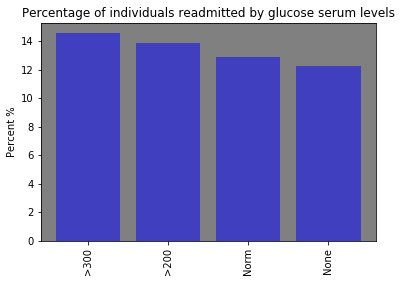

In [42]:
# Did glucose serum levels lead to readmission?
q11= """Select max_glu_serum, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
gluserum_readmitted_patients = sqldf(q11)
gluserum_readmitted_patients["percentage_of_individuals_readmitted"]= gluserum_readmitted_patients['readmitted_individuals']/gluserum_readmitted_patients['total_individuals'] * 100
gluserum_readmitted_patients= gluserum_readmitted_patients.sort_values("percentage_of_individuals_readmitted",ascending=False)
print(gluserum_readmitted_patients)

labels = (np.array(gluserum_readmitted_patients.max_glu_serum))
y_pos=np.arange(len(labels))

graph(labels=labels,data=gluserum_readmitted_patients['percentage_of_individuals_readmitted'],
      color='blue',title='Percentage of individuals readmitted by glucose serum levels',ylabel='Percent %',y_pos=y_pos,
      graph_type='bar')

  medications_status  total_individuals  readmitted_individuals  \
2               down               6841                    1031   
3                 up               6864                     984   
0             steady              47171                    5702   
1     not_prescribed              19580                    1917   

   percentage_of_individuals_readmitted  
2                             15.070896  
3                             14.335664  
0                             12.087935  
1                              9.790603  


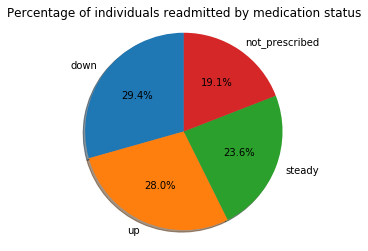

In [43]:
# Look at all different medications
medications=['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone']

diabetes_df["medications_status"] = np.where(diabetes_df[medications][diabetes_df == "Steady"].any(1), 'steady', 
                             np.where(diabetes_df[medications][diabetes_df == "Up"].any(1), 'up' ,
                             np.where(diabetes_df[medications][diabetes_df == "Down"].any(1), 'down',
                             np.where(diabetes_df[medications][diabetes_df == "No"].any(1), 'not_prescribed','unknown'))))

# Did medications_status lead to readmission?
q12= """Select medications_status, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
medication_status_readmitted_patients = sqldf(q12)
medication_status_readmitted_patients["percentage_of_individuals_readmitted"]= medication_status_readmitted_patients['readmitted_individuals']/medication_status_readmitted_patients['total_individuals'] * 100
medication_status_readmitted_patients= medication_status_readmitted_patients.sort_values("percentage_of_individuals_readmitted",ascending=False)
print(medication_status_readmitted_patients)

labels = (np.array(medication_status_readmitted_patients.medications_status))
y_pos=np.arange(len(labels))

graph(labels=labels,data=medication_status_readmitted_patients['percentage_of_individuals_readmitted'],
      title='Percentage of individuals readmitted by medication status',y_pos=y_pos,
      graph_type='pie')

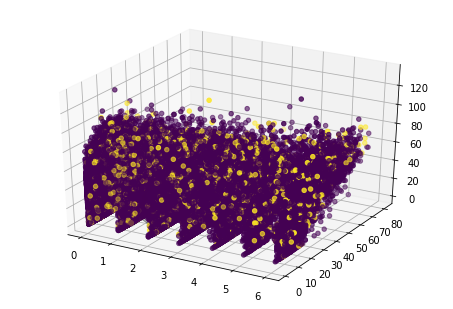

In [45]:
# Clustering kmeans on same features
diabetes_df["readmitted"]= np.where(diabetes_df["readmitted"] == '<30',1,0)
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(diabetes_df[train_cols])
# Predicting the clusters
labels = kmeans.predict(diabetes_df[train_cols])
# Getting the cluster centers
C = kmeans.cluster_centers_
X=diabetes_df[train_cols]
y=diabetes_df["readmitted"]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)